In [1]:
!pip install -q roboflow

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab 4.0.5 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.0.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.0.0 requires jupyterlab<5.0.0a0,>=4.0.6, but you have jupyterlab 4.0.5 which is incompatible.
pytoolconfig 1.2.6 requires packaging>=22.0, but you have packaging 21.3 which is incompatible.
tensorflowjs 4.13.0 requires packaging~=23.1, but you have packaging 21.3 which is incompatible.
ydata-profiling 4.5.1 requires numpy<1.24,>=1.16.0, but you have numpy 1.24.3 which is incompatible.


In [2]:
!pip install -q ultralytics==8.0.196

In [3]:
!pip install -q super-gradients

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cuml 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
aiobotocore 2.7.0 requires botocore<1.31.65,>=1.31.16, but you have botocore 1.29.165 which is incompatible.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.7 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 11.0.0 which is incompatible.
chex 0.1.84 requires numpy>=1.24.1, but you have numpy 1.23.0 which is incompatible.
cudf 23.8.0 requires pandas<1.6.0dev0,>=1.3, but you have pandas 2.0.3 which is incompatible.
cudf 23.8.0 requires protobuf<5,>=4.21, but you have protobuf 3.20.3 which is incompatible.
cuml 23.8.0 requires dask==2023.7.1, bu

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="U9tzt0h0lINQMOiD9ghs")
project = rf.workspace("abandonedobjects").project("hard-hat-sample-0gy1o")
dataset = project.version(1).download("yolov8")


In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="U9tzt0h0lINQMOiD9ghs")
project = rf.workspace("brad-dwyer").project("wildfire-smoke")
dataset = project.version(1).download("yolov8")

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Wildfire-Smoke-1 in yolov8:: 100%|██████████| 1486/1486 [00:00<00:00, 8234.20it/s]


In [5]:
LOCATION = dataset.location
print("location:", LOCATION)
CLASSES = sorted(project.classes.keys())
print("classes:", CLASSES)

location: /kaggle/working/Wildfire-Smoke-1
classes: ['smoke']


In [6]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [7]:
MODEL_ARCH = 'yolo_nas_s'
BATCH_SIZE = 8
MAX_EPOCHS = 25
CHECKPOINT_DIR = f'{HOME}/checkpoints'
EXPERIMENT_NAME = project.name.lower().replace(" ", "_")

In [8]:

LOCATION = dataset.location
CLASSES = sorted(project.classes.keys())

dataset_params = {
    'data_dir': LOCATION,
    'train_images_dir':'train/images',
    'train_labels_dir':'train/labels',
    'val_images_dir':'valid/images',
    'val_labels_dir':'valid/labels',
    'test_images_dir':'test/images',
    'test_labels_dir':'test/labels',
    'classes': CLASSES
}
from super_gradients.training import Trainer

trainer = Trainer(experiment_name=EXPERIMENT_NAME, ckpt_root_dir=CHECKPOINT_DIR)
from super_gradients.training.dataloaders.dataloaders import (coco_detection_yolo_format_train, coco_detection_yolo_format_val)

train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

[2023-12-02 16:41:52] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into /root/sg_logs/console.log


[2023-12-02 16:41:52] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-12-02 16:42:09] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-12-02 16:42:09] WARNING - export.py - Failed to import pytorch_quantization
[2023-12-02 16:42:09] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-12-02 16:42:09] WARNING - env_sanity_check.py - Failed to verify installed packages: coverage required but not found
[2023-12-02 16:42:09] WARNING - env_sanity_check.py - Failed to verify installed packages: sphinx required but not found
[2023-12-02 16:42:09] WARNING - env_sanity_check.py - Failed to verify installed packages: hydra-core required but not found
[2023-12-02 16:42:09] WARNING - env_sanity_check.py - Failed to verify installed packages: omegaconf required but not found
[2023-12-02 16:42:09] WARNING - env_sanity_check.py - Failed to verify installed packages: onnxruntime required but not found
[2023-12-02 16:42:09] WAR

In [9]:
from super_gradients.training import models

model = models.get(
    MODEL_ARCH,
    num_classes=len(dataset_params['classes']),
    pretrained_weights="coco"
)

Indexing dataset annotations: 100%|██████████| 147/147 [00:00<00:00, 5330.13it/s]
[2023-12-02 16:42:10] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_s_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_s_coco.pth
100%|██████████| 73.1M/73.1M [00:00<00:00, 272MB/s]
[2023-12-02 16:42:11] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_s


In [10]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

train_params = {
    'silent_mode': False,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    "max_epochs": MAX_EPOCHS,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

In [11]:
trainer.train(
    model=model,
    training_params=train_params,
    train_loader=train_data,
    valid_loader=val_data
)

[2023-12-02 16:42:16] INFO - sg_trainer.py - Starting a new run with `run_id=RUN_20231202_164216_806508`
[2023-12-02 16:42:16] INFO - sg_trainer.py - Checkpoints directory: /kaggle/working/checkpoints/wildfire_smoke/RUN_20231202_164216_806508
[2023-12-02 16:42:16] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}


The console stream is now moved to /kaggle/working/checkpoints/wildfire_smoke/RUN_20231202_164216_806508/console_Dec02_16_42_16.txt


Object name `linear_epoch_step` is now deprecated. Please replace it with `LinearEpochLRWarmup`.
initialize_param_groups and update_param_groups usages are deprecated since 3.4.0, will be removed in 3.5.0 and have no effect. 
 Assign different learning rates by passing a mapping of layer name prefixes to lr values through initial_lr training hyperparameter (i.e initial_lr={'backbone': 0.01, 'default':0.1})
[2023-12-02 16:42:18] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Full dataset size:            516        (len(train_set))
    - Batch size per GPU:           8          (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             8          (num_gpus * batch_size)
    - Effective Batch size:         8          (num_gpus * batch_size * batch_accumulate)
    - Iterations per epoch:         64      

SUMMARY OF EPOCH 0
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.7652
│   ├── Ppyoloeloss/loss_iou = 1.0954
│   ├── Ppyoloeloss/loss_dfl = 1.0036
│   └── Ppyoloeloss/loss = 3.8642
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.7835
    ├── Ppyoloeloss/loss_iou = 1.1471
    ├── Ppyoloeloss/loss_dfl = 0.9885
    ├── Ppyoloeloss/loss = 3.9191
    ├── Precision@0.50 = 0.0036
    ├── Recall@0.50 = 0.0
    ├── Map@0.50 = 0.0001
    └── F1@0.50 = 0.0



Validating epoch 1: 100%|██████████| 19/19 [00:02<00:00,  8.06it/s]
[2023-12-02 16:43:25] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/wildfire_smoke/RUN_20231202_164216_806508/ckpt_best.pth
[2023-12-02 16:43:25] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.00934415403753519


SUMMARY OF EPOCH 1
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.4011
│   │   ├── Epoch N-1      = 1.7652 (↘ -0.3641)
│   │   └── Best until now = 1.7652 (↘ -0.3641)
│   ├── Ppyoloeloss/loss_iou = 1.0187
│   │   ├── Epoch N-1      = 1.0954 (↘ -0.0767)
│   │   └── Best until now = 1.0954 (↘ -0.0767)
│   ├── Ppyoloeloss/loss_dfl = 0.9207
│   │   ├── Epoch N-1      = 1.0036 (↘ -0.0829)
│   │   └── Best until now = 1.0036 (↘ -0.0829)
│   └── Ppyoloeloss/loss = 3.3404
│       ├── Epoch N-1      = 3.8642 (↘ -0.5238)
│       └── Best until now = 3.8642 (↘ -0.5238)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.3673
    │   ├── Epoch N-1      = 1.7835 (↘ -0.4162)
    │   └── Best until now = 1.7835 (↘ -0.4162)
    ├── Ppyoloeloss/loss_iou = 0.9611
    │   ├── Epoch N-1      = 1.1471 (↘ -0.186)
    │   └── Best until now = 1.1471 (↘ -0.186)
    ├── Ppyoloeloss/loss_dfl = 0.8162
    │   ├── Epoch N-1      = 0.9885 (↘ -0.1723)
    │   └── Best until now = 0.9885 (↘ -0.1723)
    ├── Ppyoloeloss/loss

Validating epoch 2: 100%|██████████| 19/19 [00:02<00:00,  6.92it/s]
[2023-12-02 16:43:58] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/wildfire_smoke/RUN_20231202_164216_806508/ckpt_best.pth
[2023-12-02 16:43:58] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.06933768093585968


SUMMARY OF EPOCH 2
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.3115
│   │   ├── Epoch N-1      = 1.4011 (↘ -0.0896)
│   │   └── Best until now = 1.4011 (↘ -0.0896)
│   ├── Ppyoloeloss/loss_iou = 0.9413
│   │   ├── Epoch N-1      = 1.0187 (↘ -0.0774)
│   │   └── Best until now = 1.0187 (↘ -0.0774)
│   ├── Ppyoloeloss/loss_dfl = 0.8697
│   │   ├── Epoch N-1      = 0.9207 (↘ -0.051)
│   │   └── Best until now = 0.9207 (↘ -0.051)
│   └── Ppyoloeloss/loss = 3.1225
│       ├── Epoch N-1      = 3.3404 (↘ -0.2179)
│       └── Best until now = 3.3404 (↘ -0.2179)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.3453
    │   ├── Epoch N-1      = 1.3673 (↘ -0.022)
    │   └── Best until now = 1.3673 (↘ -0.022)
    ├── Ppyoloeloss/loss_iou = 0.9149
    │   ├── Epoch N-1      = 0.9611 (↘ -0.0462)
    │   └── Best until now = 0.9611 (↘ -0.0462)
    ├── Ppyoloeloss/loss_dfl = 0.829
    │   ├── Epoch N-1      = 0.8162 (↗ 0.0128)
    │   └── Best until now = 0.8162 (↗ 0.0128)
    ├── Ppyoloeloss/loss = 3.

Validating epoch 3: 100%|██████████| 19/19 [00:02<00:00,  7.68it/s]
[2023-12-02 16:44:30] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/wildfire_smoke/RUN_20231202_164216_806508/ckpt_best.pth
[2023-12-02 16:44:30] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.1601465940475464


SUMMARY OF EPOCH 3
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.2697
│   │   ├── Epoch N-1      = 1.3115 (↘ -0.0418)
│   │   └── Best until now = 1.3115 (↘ -0.0418)
│   ├── Ppyoloeloss/loss_iou = 0.8778
│   │   ├── Epoch N-1      = 0.9413 (↘ -0.0635)
│   │   └── Best until now = 0.9413 (↘ -0.0635)
│   ├── Ppyoloeloss/loss_dfl = 0.8431
│   │   ├── Epoch N-1      = 0.8697 (↘ -0.0265)
│   │   └── Best until now = 0.8697 (↘ -0.0265)
│   └── Ppyoloeloss/loss = 2.9906
│       ├── Epoch N-1      = 3.1225 (↘ -0.1319)
│       └── Best until now = 3.1225 (↘ -0.1319)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.395
    │   ├── Epoch N-1      = 1.3453 (↗ 0.0497)
    │   └── Best until now = 1.3453 (↗ 0.0497)
    ├── Ppyoloeloss/loss_iou = 0.768
    │   ├── Epoch N-1      = 0.9149 (↘ -0.1468)
    │   └── Best until now = 0.9149 (↘ -0.1468)
    ├── Ppyoloeloss/loss_dfl = 0.7476
    │   ├── Epoch N-1      = 0.829  (↘ -0.0813)
    │   └── Best until now = 0.8162 (↘ -0.0685)
    ├── Ppyoloeloss/loss =

Validating epoch 4: 100%|██████████| 19/19 [00:02<00:00,  7.82it/s]
[2023-12-02 16:45:03] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/wildfire_smoke/RUN_20231202_164216_806508/ckpt_best.pth
[2023-12-02 16:45:03] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.17508308589458466


SUMMARY OF EPOCH 4
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.2562
│   │   ├── Epoch N-1      = 1.2697 (↘ -0.0135)
│   │   └── Best until now = 1.2697 (↘ -0.0135)
│   ├── Ppyoloeloss/loss_iou = 0.8378
│   │   ├── Epoch N-1      = 0.8778 (↘ -0.0399)
│   │   └── Best until now = 0.8778 (↘ -0.0399)
│   ├── Ppyoloeloss/loss_dfl = 0.8219
│   │   ├── Epoch N-1      = 0.8431 (↘ -0.0213)
│   │   └── Best until now = 0.8431 (↘ -0.0213)
│   └── Ppyoloeloss/loss = 2.9159
│       ├── Epoch N-1      = 2.9906 (↘ -0.0747)
│       └── Best until now = 2.9906 (↘ -0.0747)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.3292
    │   ├── Epoch N-1      = 1.395  (↘ -0.0658)
    │   └── Best until now = 1.3453 (↘ -0.0162)
    ├── Ppyoloeloss/loss_iou = 0.8489
    │   ├── Epoch N-1      = 0.768  (↗ 0.0809)
    │   └── Best until now = 0.768  (↗ 0.0809)
    ├── Ppyoloeloss/loss_dfl = 0.8392
    │   ├── Epoch N-1      = 0.7476 (↗ 0.0916)
    │   └── Best until now = 0.7476 (↗ 0.0916)
    ├── Ppyoloeloss/loss =

Validating epoch 5: 100%|██████████| 19/19 [00:02<00:00,  7.70it/s]
[2023-12-02 16:45:37] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/wildfire_smoke/RUN_20231202_164216_806508/ckpt_best.pth
[2023-12-02 16:45:37] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.28090113401412964


SUMMARY OF EPOCH 5
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1965
│   │   ├── Epoch N-1      = 1.2562 (↘ -0.0597)
│   │   └── Best until now = 1.2562 (↘ -0.0597)
│   ├── Ppyoloeloss/loss_iou = 0.797
│   │   ├── Epoch N-1      = 0.8378 (↘ -0.0409)
│   │   └── Best until now = 0.8378 (↘ -0.0409)
│   ├── Ppyoloeloss/loss_dfl = 0.7851
│   │   ├── Epoch N-1      = 0.8219 (↘ -0.0367)
│   │   └── Best until now = 0.8219 (↘ -0.0367)
│   └── Ppyoloeloss/loss = 2.7785
│       ├── Epoch N-1      = 2.9159 (↘ -0.1374)
│       └── Best until now = 2.9159 (↘ -0.1374)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.1691
    │   ├── Epoch N-1      = 1.3292 (↘ -0.1601)
    │   └── Best until now = 1.3292 (↘ -0.1601)
    ├── Ppyoloeloss/loss_iou = 0.7211
    │   ├── Epoch N-1      = 0.8489 (↘ -0.1278)
    │   └── Best until now = 0.768  (↘ -0.047)
    ├── Ppyoloeloss/loss_dfl = 0.7269
    │   ├── Epoch N-1      = 0.8392 (↘ -0.1123)
    │   └── Best until now = 0.7476 (↘ -0.0207)
    ├── Ppyoloeloss/loss

Validating epoch 6: 100%|██████████| 19/19 [00:02<00:00,  7.68it/s]
[2023-12-02 16:46:11] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/wildfire_smoke/RUN_20231202_164216_806508/ckpt_best.pth
[2023-12-02 16:46:11] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.37243765592575073


SUMMARY OF EPOCH 6
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.2052
│   │   ├── Epoch N-1      = 1.1965 (↗ 0.0088)
│   │   └── Best until now = 1.1965 (↗ 0.0088)
│   ├── Ppyoloeloss/loss_iou = 0.7593
│   │   ├── Epoch N-1      = 0.797  (↘ -0.0376)
│   │   └── Best until now = 0.797  (↘ -0.0376)
│   ├── Ppyoloeloss/loss_dfl = 0.7666
│   │   ├── Epoch N-1      = 0.7851 (↘ -0.0185)
│   │   └── Best until now = 0.7851 (↘ -0.0185)
│   └── Ppyoloeloss/loss = 2.7312
│       ├── Epoch N-1      = 2.7785 (↘ -0.0474)
│       └── Best until now = 2.7785 (↘ -0.0474)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.1511
    │   ├── Epoch N-1      = 1.1691 (↘ -0.018)
    │   └── Best until now = 1.1691 (↘ -0.018)
    ├── Ppyoloeloss/loss_iou = 0.6754
    │   ├── Epoch N-1      = 0.7211 (↘ -0.0457)
    │   └── Best until now = 0.7211 (↘ -0.0457)
    ├── Ppyoloeloss/loss_dfl = 0.6836
    │   ├── Epoch N-1      = 0.7269 (↘ -0.0433)
    │   └── Best until now = 0.7269 (↘ -0.0433)
    ├── Ppyoloeloss/loss =

Validating epoch 7: 100%|██████████| 19/19 [00:02<00:00,  7.80it/s]
[2023-12-02 16:46:48] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/wildfire_smoke/RUN_20231202_164216_806508/ckpt_best.pth
[2023-12-02 16:46:48] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.40626269578933716


SUMMARY OF EPOCH 7
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1513
│   │   ├── Epoch N-1      = 1.2052 (↘ -0.0539)
│   │   └── Best until now = 1.1965 (↘ -0.0452)
│   ├── Ppyoloeloss/loss_iou = 0.7255
│   │   ├── Epoch N-1      = 0.7593 (↘ -0.0338)
│   │   └── Best until now = 0.7593 (↘ -0.0338)
│   ├── Ppyoloeloss/loss_dfl = 0.7327
│   │   ├── Epoch N-1      = 0.7666 (↘ -0.0339)
│   │   └── Best until now = 0.7666 (↘ -0.0339)
│   └── Ppyoloeloss/loss = 2.6096
│       ├── Epoch N-1      = 2.7312 (↘ -0.1216)
│       └── Best until now = 2.7312 (↘ -0.1216)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.1027
    │   ├── Epoch N-1      = 1.1511 (↘ -0.0484)
    │   └── Best until now = 1.1511 (↘ -0.0484)
    ├── Ppyoloeloss/loss_iou = 0.6569
    │   ├── Epoch N-1      = 0.6754 (↘ -0.0185)
    │   └── Best until now = 0.6754 (↘ -0.0185)
    ├── Ppyoloeloss/loss_dfl = 0.6756
    │   ├── Epoch N-1      = 0.6836 (↘ -0.008)
    │   └── Best until now = 0.6836 (↘ -0.008)
    ├── Ppyoloeloss/loss

Validating epoch 8: 100%|██████████| 19/19 [00:02<00:00,  7.62it/s]
[2023-12-02 16:47:22] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/wildfire_smoke/RUN_20231202_164216_806508/ckpt_best.pth
[2023-12-02 16:47:22] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.4785481095314026


SUMMARY OF EPOCH 8
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1489
│   │   ├── Epoch N-1      = 1.1513 (↘ -0.0024)
│   │   └── Best until now = 1.1513 (↘ -0.0024)
│   ├── Ppyoloeloss/loss_iou = 0.707
│   │   ├── Epoch N-1      = 0.7255 (↘ -0.0185)
│   │   └── Best until now = 0.7255 (↘ -0.0185)
│   ├── Ppyoloeloss/loss_dfl = 0.7163
│   │   ├── Epoch N-1      = 0.7327 (↘ -0.0164)
│   │   └── Best until now = 0.7327 (↘ -0.0164)
│   └── Ppyoloeloss/loss = 2.5722
│       ├── Epoch N-1      = 2.6096 (↘ -0.0374)
│       └── Best until now = 2.6096 (↘ -0.0374)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0595
    │   ├── Epoch N-1      = 1.1027 (↘ -0.0433)
    │   └── Best until now = 1.1027 (↘ -0.0433)
    ├── Ppyoloeloss/loss_iou = 0.608
    │   ├── Epoch N-1      = 0.6569 (↘ -0.0489)
    │   └── Best until now = 0.6569 (↘ -0.0489)
    ├── Ppyoloeloss/loss_dfl = 0.6221
    │   ├── Epoch N-1      = 0.6756 (↘ -0.0535)
    │   └── Best until now = 0.6756 (↘ -0.0535)
    ├── Ppyoloeloss/loss

Validating epoch 9: 100%|██████████| 19/19 [00:02<00:00,  7.54it/s]


SUMMARY OF EPOCH 9
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.143
│   │   ├── Epoch N-1      = 1.1489 (↘ -0.0059)
│   │   └── Best until now = 1.1489 (↘ -0.0059)
│   ├── Ppyoloeloss/loss_iou = 0.6936
│   │   ├── Epoch N-1      = 0.707  (↘ -0.0134)
│   │   └── Best until now = 0.707  (↘ -0.0134)
│   ├── Ppyoloeloss/loss_dfl = 0.7072
│   │   ├── Epoch N-1      = 0.7163 (↘ -0.0091)
│   │   └── Best until now = 0.7163 (↘ -0.0091)
│   └── Ppyoloeloss/loss = 2.5438
│       ├── Epoch N-1      = 2.5722 (↘ -0.0284)
│       └── Best until now = 2.5722 (↘ -0.0284)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.1134
    │   ├── Epoch N-1      = 1.0595 (↗ 0.0539)
    │   └── Best until now = 1.0595 (↗ 0.0539)
    ├── Ppyoloeloss/loss_iou = 0.596
    │   ├── Epoch N-1      = 0.608  (↘ -0.012)
    │   └── Best until now = 0.608  (↘ -0.012)
    ├── Ppyoloeloss/loss_dfl = 0.6383
    │   ├── Epoch N-1      = 0.6221 (↗ 0.0162)
    │   └── Best until now = 0.6221 (↗ 0.0162)
    ├── Ppyoloeloss/loss = 2.3

Validating epoch 10: 100%|██████████| 19/19 [00:02<00:00,  7.28it/s]
[2023-12-02 16:48:31] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/wildfire_smoke/RUN_20231202_164216_806508/ckpt_best.pth
[2023-12-02 16:48:31] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.5293862223625183


SUMMARY OF EPOCH 10
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1233
│   │   ├── Epoch N-1      = 1.143  (↘ -0.0197)
│   │   └── Best until now = 1.143  (↘ -0.0197)
│   ├── Ppyoloeloss/loss_iou = 0.6854
│   │   ├── Epoch N-1      = 0.6936 (↘ -0.0082)
│   │   └── Best until now = 0.6936 (↘ -0.0082)
│   ├── Ppyoloeloss/loss_dfl = 0.6901
│   │   ├── Epoch N-1      = 0.7072 (↘ -0.0171)
│   │   └── Best until now = 0.7072 (↘ -0.0171)
│   └── Ppyoloeloss/loss = 2.4988
│       ├── Epoch N-1      = 2.5438 (↘ -0.045)
│       └── Best until now = 2.5438 (↘ -0.045)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0821
    │   ├── Epoch N-1      = 1.1134 (↘ -0.0313)
    │   └── Best until now = 1.0595 (↗ 0.0226)
    ├── Ppyoloeloss/loss_iou = 0.5858
    │   ├── Epoch N-1      = 0.596  (↘ -0.0102)
    │   └── Best until now = 0.596  (↘ -0.0102)
    ├── Ppyoloeloss/loss_dfl = 0.6231
    │   ├── Epoch N-1      = 0.6383 (↘ -0.0151)
    │   └── Best until now = 0.6221 (↗ 0.001)
    ├── Ppyoloeloss/loss =

Validating epoch 11: 100%|██████████| 19/19 [00:02<00:00,  7.82it/s]
[2023-12-02 16:49:07] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/wildfire_smoke/RUN_20231202_164216_806508/ckpt_best.pth
[2023-12-02 16:49:07] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.5329997539520264


SUMMARY OF EPOCH 11
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0932
│   │   ├── Epoch N-1      = 1.1233 (↘ -0.0302)
│   │   └── Best until now = 1.1233 (↘ -0.0302)
│   ├── Ppyoloeloss/loss_iou = 0.6748
│   │   ├── Epoch N-1      = 0.6854 (↘ -0.0106)
│   │   └── Best until now = 0.6854 (↘ -0.0106)
│   ├── Ppyoloeloss/loss_dfl = 0.6947
│   │   ├── Epoch N-1      = 0.6901 (↗ 0.0046)
│   │   └── Best until now = 0.6901 (↗ 0.0046)
│   └── Ppyoloeloss/loss = 2.4626
│       ├── Epoch N-1      = 2.4988 (↘ -0.0362)
│       └── Best until now = 2.4988 (↘ -0.0362)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0661
    │   ├── Epoch N-1      = 1.0821 (↘ -0.0159)
    │   └── Best until now = 1.0595 (↗ 0.0067)
    ├── Ppyoloeloss/loss_iou = 0.5866
    │   ├── Epoch N-1      = 0.5858 (↗ 0.0008)
    │   └── Best until now = 0.5858 (↗ 0.0008)
    ├── Ppyoloeloss/loss_dfl = 0.6204
    │   ├── Epoch N-1      = 0.6231 (↘ -0.0028)
    │   └── Best until now = 0.6221 (↘ -0.0018)
    ├── Ppyoloeloss/loss =

Validating epoch 12: 100%|██████████| 19/19 [00:02<00:00,  7.67it/s]
[2023-12-02 16:49:43] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/wildfire_smoke/RUN_20231202_164216_806508/ckpt_best.pth
[2023-12-02 16:49:43] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.540738046169281


SUMMARY OF EPOCH 12
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0912
│   │   ├── Epoch N-1      = 1.0932 (↘ -0.002)
│   │   └── Best until now = 1.0932 (↘ -0.002)
│   ├── Ppyoloeloss/loss_iou = 0.6669
│   │   ├── Epoch N-1      = 0.6748 (↘ -0.0079)
│   │   └── Best until now = 0.6748 (↘ -0.0079)
│   ├── Ppyoloeloss/loss_dfl = 0.6864
│   │   ├── Epoch N-1      = 0.6947 (↘ -0.0083)
│   │   └── Best until now = 0.6901 (↘ -0.0037)
│   └── Ppyoloeloss/loss = 2.4444
│       ├── Epoch N-1      = 2.4626 (↘ -0.0182)
│       └── Best until now = 2.4626 (↘ -0.0182)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.1335
    │   ├── Epoch N-1      = 1.0661 (↗ 0.0674)
    │   └── Best until now = 1.0595 (↗ 0.0741)
    ├── Ppyoloeloss/loss_iou = 0.5701
    │   ├── Epoch N-1      = 0.5866 (↘ -0.0165)
    │   └── Best until now = 0.5858 (↘ -0.0157)
    ├── Ppyoloeloss/loss_dfl = 0.6132
    │   ├── Epoch N-1      = 0.6204 (↘ -0.0072)
    │   └── Best until now = 0.6204 (↘ -0.0072)
    ├── Ppyoloeloss/loss 

Validating epoch 13: 100%|██████████| 19/19 [00:02<00:00,  7.72it/s]
[2023-12-02 16:50:22] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/wildfire_smoke/RUN_20231202_164216_806508/ckpt_best.pth
[2023-12-02 16:50:22] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6732615232467651


SUMMARY OF EPOCH 13
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0817
│   │   ├── Epoch N-1      = 1.0912 (↘ -0.0095)
│   │   └── Best until now = 1.0912 (↘ -0.0095)
│   ├── Ppyoloeloss/loss_iou = 0.6558
│   │   ├── Epoch N-1      = 0.6669 (↘ -0.0111)
│   │   └── Best until now = 0.6669 (↘ -0.0111)
│   ├── Ppyoloeloss/loss_dfl = 0.6731
│   │   ├── Epoch N-1      = 0.6864 (↘ -0.0132)
│   │   └── Best until now = 0.6864 (↘ -0.0132)
│   └── Ppyoloeloss/loss = 2.4106
│       ├── Epoch N-1      = 2.4444 (↘ -0.0338)
│       └── Best until now = 2.4444 (↘ -0.0338)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0032
    │   ├── Epoch N-1      = 1.1335 (↘ -0.1303)
    │   └── Best until now = 1.0595 (↘ -0.0563)
    ├── Ppyoloeloss/loss_iou = 0.5656
    │   ├── Epoch N-1      = 0.5701 (↘ -0.0045)
    │   └── Best until now = 0.5701 (↘ -0.0045)
    ├── Ppyoloeloss/loss_dfl = 0.5856
    │   ├── Epoch N-1      = 0.6132 (↘ -0.0276)
    │   └── Best until now = 0.6132 (↘ -0.0276)
    ├── Ppyoloeloss/l

Validating epoch 14: 100%|██████████| 19/19 [00:02<00:00,  7.76it/s]


SUMMARY OF EPOCH 14
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.08
│   │   ├── Epoch N-1      = 1.0817 (↘ -0.0017)
│   │   └── Best until now = 1.0817 (↘ -0.0017)
│   ├── Ppyoloeloss/loss_iou = 0.6286
│   │   ├── Epoch N-1      = 0.6558 (↘ -0.0272)
│   │   └── Best until now = 0.6558 (↘ -0.0272)
│   ├── Ppyoloeloss/loss_dfl = 0.6621
│   │   ├── Epoch N-1      = 0.6731 (↘ -0.011)
│   │   └── Best until now = 0.6731 (↘ -0.011)
│   └── Ppyoloeloss/loss = 2.3707
│       ├── Epoch N-1      = 2.4106 (↘ -0.0399)
│       └── Best until now = 2.4106 (↘ -0.0399)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.067
    │   ├── Epoch N-1      = 1.0032 (↗ 0.0638)
    │   └── Best until now = 1.0032 (↗ 0.0638)
    ├── Ppyoloeloss/loss_iou = 0.5682
    │   ├── Epoch N-1      = 0.5656 (↗ 0.0026)
    │   └── Best until now = 0.5656 (↗ 0.0026)
    ├── Ppyoloeloss/loss_dfl = 0.6127
    │   ├── Epoch N-1      = 0.5856 (↗ 0.0271)
    │   └── Best until now = 0.5856 (↗ 0.0271)
    ├── Ppyoloeloss/loss = 2.247

Validating epoch 15: 100%|██████████| 19/19 [00:02<00:00,  7.71it/s]
[2023-12-02 16:51:32] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/wildfire_smoke/RUN_20231202_164216_806508/ckpt_best.pth
[2023-12-02 16:51:32] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7039739489555359


SUMMARY OF EPOCH 15
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0604
│   │   ├── Epoch N-1      = 1.08   (↘ -0.0196)
│   │   └── Best until now = 1.08   (↘ -0.0196)
│   ├── Ppyoloeloss/loss_iou = 0.6078
│   │   ├── Epoch N-1      = 0.6286 (↘ -0.0208)
│   │   └── Best until now = 0.6286 (↘ -0.0208)
│   ├── Ppyoloeloss/loss_dfl = 0.6461
│   │   ├── Epoch N-1      = 0.6621 (↘ -0.016)
│   │   └── Best until now = 0.6621 (↘ -0.016)
│   └── Ppyoloeloss/loss = 2.3143
│       ├── Epoch N-1      = 2.3707 (↘ -0.0564)
│       └── Best until now = 2.3707 (↘ -0.0564)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9826
    │   ├── Epoch N-1      = 1.067  (↘ -0.0844)
    │   └── Best until now = 1.0032 (↘ -0.0206)
    ├── Ppyoloeloss/loss_iou = 0.556
    │   ├── Epoch N-1      = 0.5682 (↘ -0.0122)
    │   └── Best until now = 0.5656 (↘ -0.0096)
    ├── Ppyoloeloss/loss_dfl = 0.5819
    │   ├── Epoch N-1      = 0.6127 (↘ -0.0308)
    │   └── Best until now = 0.5856 (↘ -0.0037)
    ├── Ppyoloeloss/loss

Validating epoch 16: 100%|██████████| 19/19 [00:02<00:00,  7.69it/s]


SUMMARY OF EPOCH 16
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0557
│   │   ├── Epoch N-1      = 1.0604 (↘ -0.0047)
│   │   └── Best until now = 1.0604 (↘ -0.0047)
│   ├── Ppyoloeloss/loss_iou = 0.6077
│   │   ├── Epoch N-1      = 0.6078 (↘ -1e-04)
│   │   └── Best until now = 0.6078 (↘ -1e-04)
│   ├── Ppyoloeloss/loss_dfl = 0.6413
│   │   ├── Epoch N-1      = 0.6461 (↘ -0.0049)
│   │   └── Best until now = 0.6461 (↘ -0.0049)
│   └── Ppyoloeloss/loss = 2.3046
│       ├── Epoch N-1      = 2.3143 (↘ -0.0097)
│       └── Best until now = 2.3143 (↘ -0.0097)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0156
    │   ├── Epoch N-1      = 0.9826 (↗ 0.033)
    │   └── Best until now = 0.9826 (↗ 0.033)
    ├── Ppyoloeloss/loss_iou = 0.531
    │   ├── Epoch N-1      = 0.556  (↘ -0.025)
    │   └── Best until now = 0.556  (↘ -0.025)
    ├── Ppyoloeloss/loss_dfl = 0.576
    │   ├── Epoch N-1      = 0.5819 (↘ -0.0059)
    │   └── Best until now = 0.5819 (↘ -0.0059)
    ├── Ppyoloeloss/loss = 2.12

Validating epoch 17: 100%|██████████| 19/19 [00:02<00:00,  7.43it/s]
[2023-12-02 16:52:43] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/wildfire_smoke/RUN_20231202_164216_806508/ckpt_best.pth
[2023-12-02 16:52:43] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7105106115341187


SUMMARY OF EPOCH 17
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0507
│   │   ├── Epoch N-1      = 1.0557 (↘ -0.005)
│   │   └── Best until now = 1.0557 (↘ -0.005)
│   ├── Ppyoloeloss/loss_iou = 0.6101
│   │   ├── Epoch N-1      = 0.6077 (↗ 0.0024)
│   │   └── Best until now = 0.6077 (↗ 0.0024)
│   ├── Ppyoloeloss/loss_dfl = 0.6165
│   │   ├── Epoch N-1      = 0.6413 (↘ -0.0248)
│   │   └── Best until now = 0.6413 (↘ -0.0248)
│   └── Ppyoloeloss/loss = 2.2772
│       ├── Epoch N-1      = 2.3046 (↘ -0.0274)
│       └── Best until now = 2.3046 (↘ -0.0274)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9669
    │   ├── Epoch N-1      = 1.0156 (↘ -0.0487)
    │   └── Best until now = 0.9826 (↘ -0.0157)
    ├── Ppyoloeloss/loss_iou = 0.5243
    │   ├── Epoch N-1      = 0.531  (↘ -0.0067)
    │   └── Best until now = 0.531  (↘ -0.0067)
    ├── Ppyoloeloss/loss_dfl = 0.5654
    │   ├── Epoch N-1      = 0.576  (↘ -0.0106)
    │   └── Best until now = 0.576  (↘ -0.0106)
    ├── Ppyoloeloss/loss 

Validating epoch 18: 100%|██████████| 19/19 [00:02<00:00,  7.62it/s]
[2023-12-02 16:53:20] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/wildfire_smoke/RUN_20231202_164216_806508/ckpt_best.pth
[2023-12-02 16:53:20] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7534313201904297


SUMMARY OF EPOCH 18
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0242
│   │   ├── Epoch N-1      = 1.0507 (↘ -0.0265)
│   │   └── Best until now = 1.0507 (↘ -0.0265)
│   ├── Ppyoloeloss/loss_iou = 0.5978
│   │   ├── Epoch N-1      = 0.6101 (↘ -0.0123)
│   │   └── Best until now = 0.6077 (↘ -0.0099)
│   ├── Ppyoloeloss/loss_dfl = 0.6255
│   │   ├── Epoch N-1      = 0.6165 (↗ 0.009)
│   │   └── Best until now = 0.6165 (↗ 0.009)
│   └── Ppyoloeloss/loss = 2.2474
│       ├── Epoch N-1      = 2.2772 (↘ -0.0298)
│       └── Best until now = 2.2772 (↘ -0.0298)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9805
    │   ├── Epoch N-1      = 0.9669 (↗ 0.0136)
    │   └── Best until now = 0.9669 (↗ 0.0136)
    ├── Ppyoloeloss/loss_iou = 0.5163
    │   ├── Epoch N-1      = 0.5243 (↘ -0.0079)
    │   └── Best until now = 0.5243 (↘ -0.0079)
    ├── Ppyoloeloss/loss_dfl = 0.5525
    │   ├── Epoch N-1      = 0.5654 (↘ -0.0128)
    │   └── Best until now = 0.5654 (↘ -0.0128)
    ├── Ppyoloeloss/loss = 

Validating epoch 19: 100%|██████████| 19/19 [00:02<00:00,  7.72it/s]
[2023-12-02 16:53:55] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/wildfire_smoke/RUN_20231202_164216_806508/ckpt_best.pth
[2023-12-02 16:53:55] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.774351954460144


SUMMARY OF EPOCH 19
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0116
│   │   ├── Epoch N-1      = 1.0242 (↘ -0.0126)
│   │   └── Best until now = 1.0242 (↘ -0.0126)
│   ├── Ppyoloeloss/loss_iou = 0.5928
│   │   ├── Epoch N-1      = 0.5978 (↘ -0.0049)
│   │   └── Best until now = 0.5978 (↘ -0.0049)
│   ├── Ppyoloeloss/loss_dfl = 0.6182
│   │   ├── Epoch N-1      = 0.6255 (↘ -0.0072)
│   │   └── Best until now = 0.6165 (↗ 0.0018)
│   └── Ppyoloeloss/loss = 2.2227
│       ├── Epoch N-1      = 2.2474 (↘ -0.0247)
│       └── Best until now = 2.2474 (↘ -0.0247)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9878
    │   ├── Epoch N-1      = 0.9805 (↗ 0.0073)
    │   └── Best until now = 0.9669 (↗ 0.0209)
    ├── Ppyoloeloss/loss_iou = 0.519
    │   ├── Epoch N-1      = 0.5163 (↗ 0.0026)
    │   └── Best until now = 0.5163 (↗ 0.0026)
    ├── Ppyoloeloss/loss_dfl = 0.5498
    │   ├── Epoch N-1      = 0.5525 (↘ -0.0027)
    │   └── Best until now = 0.5525 (↘ -0.0027)
    ├── Ppyoloeloss/loss = 

Validating epoch 20: 100%|██████████| 19/19 [00:02<00:00,  7.67it/s]
[2023-12-02 16:54:32] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/wildfire_smoke/RUN_20231202_164216_806508/ckpt_best.pth
[2023-12-02 16:54:32] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7827290296554565


SUMMARY OF EPOCH 20
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0121
│   │   ├── Epoch N-1      = 1.0116 (↗ 0.0005)
│   │   └── Best until now = 1.0116 (↗ 0.0005)
│   ├── Ppyoloeloss/loss_iou = 0.5933
│   │   ├── Epoch N-1      = 0.5928 (↗ 0.0004)
│   │   └── Best until now = 0.5928 (↗ 0.0004)
│   ├── Ppyoloeloss/loss_dfl = 0.6206
│   │   ├── Epoch N-1      = 0.6182 (↗ 0.0024)
│   │   └── Best until now = 0.6165 (↗ 0.0041)
│   └── Ppyoloeloss/loss = 2.226
│       ├── Epoch N-1      = 2.2227 (↗ 0.0033)
│       └── Best until now = 2.2227 (↗ 0.0033)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9465
    │   ├── Epoch N-1      = 0.9878 (↘ -0.0413)
    │   └── Best until now = 0.9669 (↘ -0.0204)
    ├── Ppyoloeloss/loss_iou = 0.512
    │   ├── Epoch N-1      = 0.519  (↘ -0.007)
    │   └── Best until now = 0.5163 (↘ -0.0044)
    ├── Ppyoloeloss/loss_dfl = 0.5574
    │   ├── Epoch N-1      = 0.5498 (↗ 0.0076)
    │   └── Best until now = 0.5498 (↗ 0.0076)
    ├── Ppyoloeloss/loss = 2.0159


Validating epoch 21: 100%|██████████| 19/19 [00:02<00:00,  7.63it/s]
[2023-12-02 16:55:10] INFO - base_sg_logger.py - Checkpoint saved in /kaggle/working/checkpoints/wildfire_smoke/RUN_20231202_164216_806508/ckpt_best.pth
[2023-12-02 16:55:10] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8494155406951904


SUMMARY OF EPOCH 21
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.99
│   │   ├── Epoch N-1      = 1.0121 (↘ -0.0222)
│   │   └── Best until now = 1.0116 (↘ -0.0217)
│   ├── Ppyoloeloss/loss_iou = 0.5804
│   │   ├── Epoch N-1      = 0.5933 (↘ -0.0129)
│   │   └── Best until now = 0.5928 (↘ -0.0125)
│   ├── Ppyoloeloss/loss_dfl = 0.5918
│   │   ├── Epoch N-1      = 0.6206 (↘ -0.0289)
│   │   └── Best until now = 0.6165 (↘ -0.0247)
│   └── Ppyoloeloss/loss = 2.1621
│       ├── Epoch N-1      = 2.226  (↘ -0.0639)
│       └── Best until now = 2.2227 (↘ -0.0606)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9313
    │   ├── Epoch N-1      = 0.9465 (↘ -0.0152)
    │   └── Best until now = 0.9465 (↘ -0.0152)
    ├── Ppyoloeloss/loss_iou = 0.5169
    │   ├── Epoch N-1      = 0.512  (↗ 0.005)
    │   └── Best until now = 0.512  (↗ 0.005)
    ├── Ppyoloeloss/loss_dfl = 0.5471
    │   ├── Epoch N-1      = 0.5574 (↘ -0.0103)
    │   └── Best until now = 0.5498 (↘ -0.0027)
    ├── Ppyoloeloss/loss = 

Validating epoch 22: 100%|██████████| 19/19 [00:02<00:00,  7.95it/s]


SUMMARY OF EPOCH 22
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9788
│   │   ├── Epoch N-1      = 0.99   (↘ -0.0112)
│   │   └── Best until now = 0.99   (↘ -0.0112)
│   ├── Ppyoloeloss/loss_iou = 0.5677
│   │   ├── Epoch N-1      = 0.5804 (↘ -0.0127)
│   │   └── Best until now = 0.5804 (↘ -0.0127)
│   ├── Ppyoloeloss/loss_dfl = 0.5918
│   │   ├── Epoch N-1      = 0.5918 (↘ -0.0)
│   │   └── Best until now = 0.5918 (↘ -0.0)
│   └── Ppyoloeloss/loss = 2.1382
│       ├── Epoch N-1      = 2.1621 (↘ -0.0239)
│       └── Best until now = 2.1621 (↘ -0.0239)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8932
    │   ├── Epoch N-1      = 0.9313 (↘ -0.0381)
    │   └── Best until now = 0.9313 (↘ -0.0381)
    ├── Ppyoloeloss/loss_iou = 0.5117
    │   ├── Epoch N-1      = 0.5169 (↘ -0.0053)
    │   └── Best until now = 0.512  (↘ -0.0003)
    ├── Ppyoloeloss/loss_dfl = 0.5378
    │   ├── Epoch N-1      = 0.5471 (↘ -0.0094)
    │   └── Best until now = 0.5471 (↘ -0.0094)
    ├── Ppyoloeloss/loss = 

Validating epoch 23: 100%|██████████| 19/19 [00:02<00:00,  7.73it/s]


SUMMARY OF EPOCH 23
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9629
│   │   ├── Epoch N-1      = 0.9788 (↘ -0.0159)
│   │   └── Best until now = 0.9788 (↘ -0.0159)
│   ├── Ppyoloeloss/loss_iou = 0.57
│   │   ├── Epoch N-1      = 0.5677 (↗ 0.0023)
│   │   └── Best until now = 0.5677 (↗ 0.0023)
│   ├── Ppyoloeloss/loss_dfl = 0.5844
│   │   ├── Epoch N-1      = 0.5918 (↘ -0.0074)
│   │   └── Best until now = 0.5918 (↘ -0.0074)
│   └── Ppyoloeloss/loss = 2.1172
│       ├── Epoch N-1      = 2.1382 (↘ -0.021)
│       └── Best until now = 2.1382 (↘ -0.021)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9204
    │   ├── Epoch N-1      = 0.8932 (↗ 0.0272)
    │   └── Best until now = 0.8932 (↗ 0.0272)
    ├── Ppyoloeloss/loss_iou = 0.5107
    │   ├── Epoch N-1      = 0.5117 (↘ -0.0009)
    │   └── Best until now = 0.5117 (↘ -0.0009)
    ├── Ppyoloeloss/loss_dfl = 0.5462
    │   ├── Epoch N-1      = 0.5378 (↗ 0.0084)
    │   └── Best until now = 0.5378 (↗ 0.0084)
    ├── Ppyoloeloss/loss = 1.97

Validating epoch 24: 100%|██████████| 19/19 [00:02<00:00,  7.71it/s]


SUMMARY OF EPOCH 24
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9571
│   │   ├── Epoch N-1      = 0.9629 (↘ -0.0057)
│   │   └── Best until now = 0.9629 (↘ -0.0057)
│   ├── Ppyoloeloss/loss_iou = 0.5881
│   │   ├── Epoch N-1      = 0.57   (↗ 0.0181)
│   │   └── Best until now = 0.5677 (↗ 0.0204)
│   ├── Ppyoloeloss/loss_dfl = 0.5994
│   │   ├── Epoch N-1      = 0.5844 (↗ 0.015)
│   │   └── Best until now = 0.5844 (↗ 0.015)
│   └── Ppyoloeloss/loss = 2.1446
│       ├── Epoch N-1      = 2.1172 (↗ 0.0274)
│       └── Best until now = 2.1172 (↗ 0.0274)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9058
    │   ├── Epoch N-1      = 0.9204 (↘ -0.0146)
    │   └── Best until now = 0.8932 (↗ 0.0126)
    ├── Ppyoloeloss/loss_iou = 0.503
    │   ├── Epoch N-1      = 0.5107 (↘ -0.0077)
    │   └── Best until now = 0.5107 (↘ -0.0077)
    ├── Ppyoloeloss/loss_dfl = 0.5399
    │   ├── Epoch N-1      = 0.5462 (↘ -0.0063)
    │   └── Best until now = 0.5378 (↗ 0.0021)
    ├── Ppyoloeloss/loss = 1.948

[2023-12-02 16:56:58] INFO - sg_trainer.py - RUNNING ADDITIONAL TEST ON THE AVERAGED MODEL...
Validating epoch 25:  95%|█████████▍| 18/19 [00:02<00:00,  9.46it/s]

In [12]:
!zip -r yolo_nas.zip {CHECKPOINT_DIR}/{EXPERIMENT_NAME}

Validating epoch 25: 100%|██████████| 19/19 [00:02<00:00,  7.77it/s]
[2023-12-02 16:57:01] INFO - base_sg_logger.py - [CLEANUP] - Successfully stopped system monitoring process


  adding: kaggle/working/checkpoints/wildfire_smoke/ (stored 0%)
  adding: kaggle/working/checkpoints/wildfire_smoke/RUN_20231202_164216_806508/ (stored 0%)
  adding: kaggle/working/checkpoints/wildfire_smoke/RUN_20231202_164216_806508/events.out.tfevents.1701535336.be85332c4b7e.47.0 (deflated 85%)
  adding: kaggle/working/checkpoints/wildfire_smoke/RUN_20231202_164216_806508/events.out.tfevents.1701536221.be85332c4b7e.47.1 (deflated 9%)
  adding: kaggle/working/checkpoints/wildfire_smoke/RUN_20231202_164216_806508/ckpt_best.pth (deflated 8%)
  adding: kaggle/working/checkpoints/wildfire_smoke/RUN_20231202_164216_806508/console_Dec02_16_42_16.txt (deflated 95%)
  adding: kaggle/working/checkpoints/wildfire_smoke/RUN_20231202_164216_806508/experiment_logs_Dec02_16_42_16.txt (deflated 75%)
  adding: kaggle/working/checkpoints/wildfire_smoke/RUN_20231202_164216_806508/average_model.pth (deflated 8%)
  adding: kaggle/working/checkpoints/wildfire_smoke/RUN_20231202_164216_806508/ckpt_latest

In [13]:
CHECKPOINT_DIR,EXPERIMENT_NAME

('/kaggle/working/checkpoints', 'wildfire_smoke')

In [14]:
import torch
DEVICE = 'cuda' if torch.cuda.is_available() else "cpu"

In [20]:
best_model = models.get(
    MODEL_ARCH,
    num_classes=len(dataset_params['classes']),
     checkpoint_path=f"{CHECKPOINT_DIR}/{EXPERIMENT_NAME}/RUN_20231202_164216_806508/average_model.pth"
).to(DEVICE)

[2023-12-02 17:00:01] INFO - checkpoint_utils.py - Successfully loaded model weights from /kaggle/working/checkpoints/wildfire_smoke/RUN_20231202_164216_806508/average_model.pth EMA checkpoint.


In [24]:
test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

[2023-12-02 17:00:52] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 74/74 [00:00<00:00, 5493.13it/s]


In [25]:

trainer.test(
    model=best_model,
    test_loader=test_data,
    test_metrics_list=DetectionMetrics_050(
        score_thres=0.1,
        top_k_predictions=300,
        num_cls=len(dataset_params['classes']),
        normalize_targets=True,
        post_prediction_callback=PPYoloEPostPredictionCallback(
            score_threshold=0.01,
            nms_top_k=1000,
            max_predictions=300,
            nms_threshold=0.7
        )
    )
)

Testing: 100%|██████████| 10/10 [00:01<00:00,  7.08it/s]

{'PPYoloELoss/loss_cls': 0.9009052,
 'PPYoloELoss/loss_iou': 0.4827123,
 'PPYoloELoss/loss_dfl': 0.54410446,
 'PPYoloELoss/loss': 1.927722,
 'Precision@0.50': 0.04639498516917229,
 'Recall@0.50': 1.0,
 'mAP@0.50': 0.855618417263031,
 'F1@0.50': 0.088675856590271}

Testing: 100%|██████████| 10/10 [00:01<00:00,  5.51it/s]


In [26]:
!pip install -q supervision

In [27]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml",
    force_masks=False
)

In [29]:
import supervision as sv

CONFIDENCE_TRESHOLD = 0.5

predictions = {}

for image_name, image in ds.images.items():
    result = list(best_model.predict(image, conf=CONFIDENCE_TRESHOLD))[0]
    detections = sv.Detections(
        xyxy=result.prediction.bboxes_xyxy,
        confidence=result.prediction.confidence,
        class_id=result.prediction.labels.astype(int)
    )
    predictions[image_name] = detections

[2023-12-02 17:01:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-02 17:01:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-02 17:01:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-02 17:01:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-02 17:01:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-02 17:01:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-02 17:01:53] INFO -

In [30]:
import random
random.seed(10)

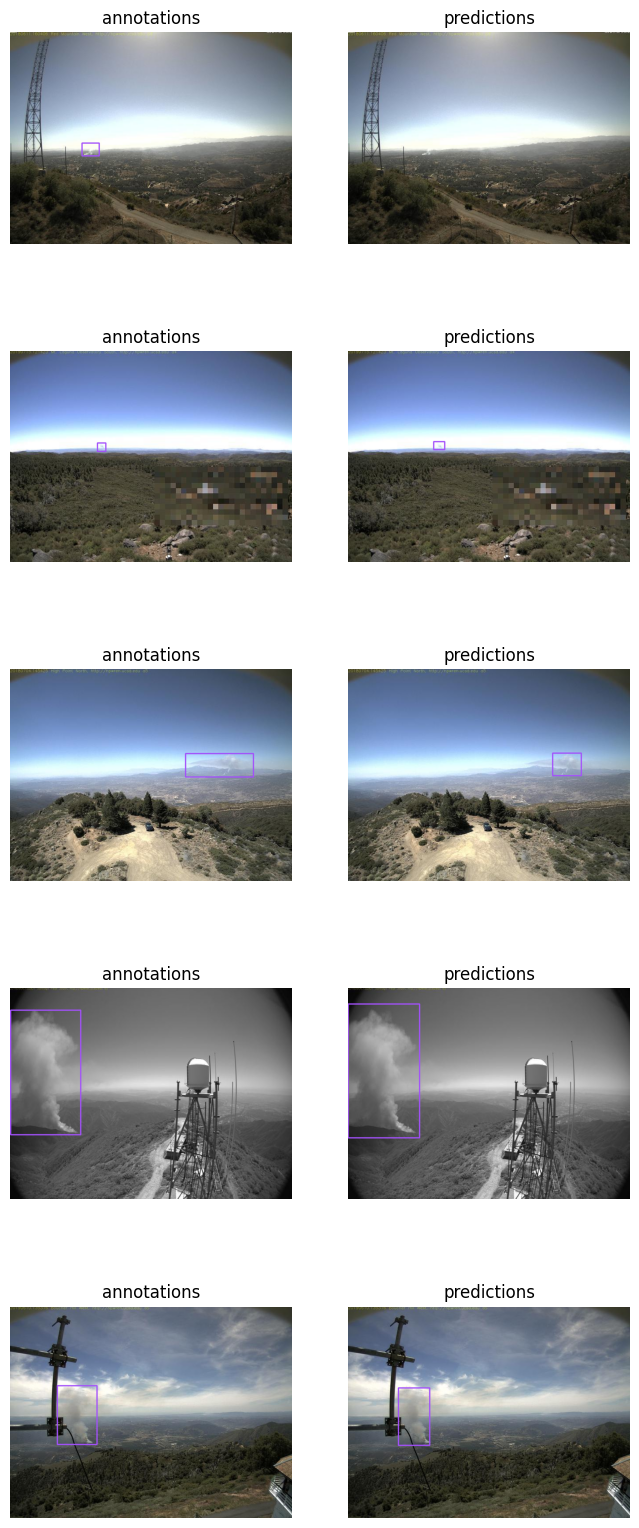

In [32]:
import supervision as sv

MAX_IMAGE_COUNT = 5

n = min(MAX_IMAGE_COUNT, len(ds.images))

keys = list(ds.images.keys())
keys = random.sample(keys, n)

box_annotator = sv.BoxAnnotator()

images = []
titles = []

for key in keys:
    frame_with_annotations = box_annotator.annotate(
        scene=ds.images[key].copy(),
        detections=ds.annotations[key],
        skip_label=True
    )
    images.append(frame_with_annotations)
    titles.append('annotations')
    frame_with_predictions = box_annotator.annotate(
        scene=ds.images[key].copy(),
        detections=predictions[key],
        skip_label=True
    )
    images.append(frame_with_predictions)
    titles.append('predictions')

%matplotlib inline
sv.plot_images_grid(images=images, titles=titles, grid_size=(n, 2), size=(2 * 4, n * 4))